# Introduction

Ši užrašų knygutė yra skirta gretutinių studijų analizei. Čia nagrinėjama gretutinių studijų pasirinkimo dinamika, ieškoma dėsningumu. 

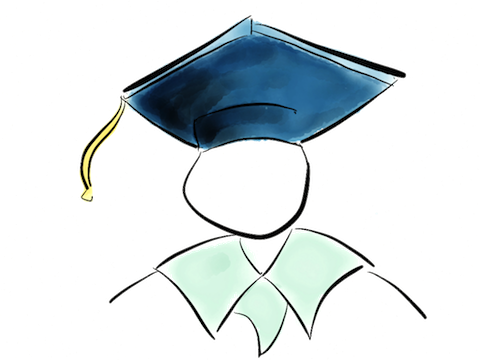

In [2]:
from IPython.display import Image
Image('http://www6.cityu.edu.hk/projectflame/images/indexikon/withHat.png',width=100) 

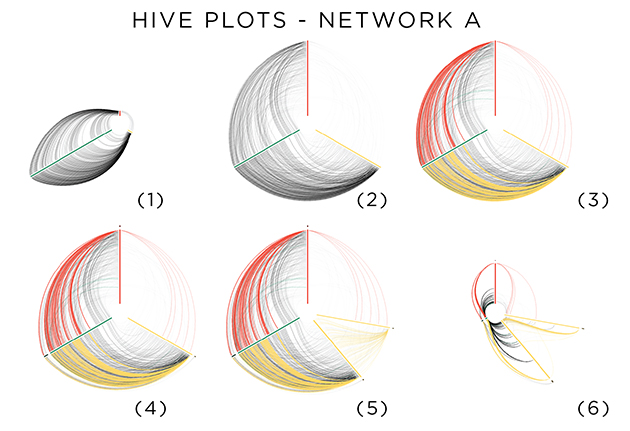

In [3]:
Image('http://morphocode.com/wp-content/uploads/2013/07/krzywinski-hiveplot-poster.jpg',width=50)

## Įvadas

Tai yra gretutinės studijos. Sunku nustatyti, kada įvyko pirmieji gretutinių studijų atvejai. Tačiau, gretutinės studijos yra pasaulio mastu atpažįstama akademinės kultūros dalis. Gretutinės studijos pastebimos ir Lietuvos aukštojo mokslo institucijoje. Čia bus nagrinėjamas VDU gretutinių studijų reiškinys.


# Teorija

Naudosime grafas.
(V,E), kur V - viršūnių rinkinys, o E kraštinių rinkinys.
$$ V =\{v_1,..., v_5\} $$ 
$$ E = \{(v_1, v_2),(v_2, v_5),(v_5, v_5),(v_5, v_4),(v_5, v_4)\}$$ 
Supaprastinimo vardan naudosimetokį žymėjimą: $_p,_q$ and $_r$.
Tarkime, kad mūsų viršūnės yra trys studijų programos: teisė, politikos mokslai ir istorija. 

p - 'teise', 
q - 'politikos_mokslai' and 
r - 'istorija'

Svorio skaičiavimas:

$$D - svoris$$

$$D_{(p,q)}$$

Mūsų atveju kraštinės, jungančios du viršūnes svorys yra lygus.

p - pagrindinė studijų programa

q - gretutinė studijų programa

n - bet kokia gretutinė programa

D - kraštinės svoris

$H_x$ - visi galėję rinktis studijų programą x.

$S_{x,m,k}$ - studentų, įstojusių į studijų programą x, m metais ir gretutines pasirinkusių k kurse, skaičius.

$m_i$, - metai, kuriuose pasirinktos gretutinės studijos.

$$H_x = S_{x, 2014, 4} + S_{x, 2014, 3} + S_{x, 2014, 2} + S_{x, 2014, 1} + S_{x, 2013, 3} + S_{x, 2013, 2} + S_{x, 2013, 1} + S_{x, 2012, 2} + S_{x, 2012, 2}  + S_{x, 2011, 1}$$

$$H_{x} = \sum {S_{x, x, m-2010}}$$

$$H_{2014} = \sum {S_{2014, 2014, (m-2010)}}$$

$$D_{(p,q)}= \frac{\sum_{(p,q)}} {\sum_{(p,n)}} \cdot \frac {1}{H_p}$$

Kaip atrasti dominuojantį svorį?
$D_{(p,q)}$ yra dominuojantis, jeigu $\frac{D_{(p,q)}} {D_{(q,p)}} > 0$ 

Svorių suvienodinimas, jei $D_{(p,q)} > 0$ ir $D_{(q,p)} > 0$ ir $D_{(p,q)}  \neq D_{(q,p)}$.


*Apie trijų narių ryšius. Tarkime, jog turime $D_{(p,q)}$, $D_{(p,r)}$ ir $D_{(p,q)}$                                                            
jei $D_{(p,q)} > D_{(p,r)}$ tai koks $D_{(p,r)}$? 
$$(x,y)$$

$(x)^{(-1)}$

$m_i$, 
$m_3$ 


# 1 The data

In [4]:
import os
import glob
import re
import codecs
import pickle

In [5]:
f = open("Data/edgelist.p","rb")
edgelist = pickle.loads(f.read())

f = open("Data/nodelist.p","rb")
nodelist = pickle.loads(f.read())

In [6]:
len(edgelist)

698

# 2 DATAFRAMES

## 2.1 EDGE DATAFRAME

Kuriame gretutinių studijų pasirinkimo dataframe. Šie duomenys gauti iš VDU. Šis dataframe yra pats svarbiausias mūsų tyrimui. Sukūrę jį mes jį pildysime naudodami duomenis iš kitų šaltinių. Taip pat, jį naudosime konstruodami grafą.

In [7]:
import pandas as pd
# Pandas settings
pd.options.display.mpl_style = 'default'
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 7)
pd.set_option('display.width', 10)

# Loading DFs
dfe = pd.read_pickle('data/dfe.pkl')
dfn = pd.read_pickle('data/dfn.pkl')
dff = pd.read_pickle('data/dff.pkl')

# Saving DFs
import time
timestr = time.strftime("%Y-%m-%d_%H-%M")
timestrless = time.strftime("%Y-%m-%d")
#dfe.to_pickle('data/dfe.pkl')
#dfn.to_pickle('data/dfn.pkl')
#dff.to_pickle('data/dff.pkl')

#dfe.to_pickle('data/dfe{}.pkl'.format(timestrless))
#dfn.to_pickle('data/dfn{}.pkl'.format(timestrless))
#dff.to_pickle('data/dff{}.pkl'.format(timestrless))

In [8]:
import json

json_data=open(r'json/get_faculty_name.json')
get_faculty_name = json.load(json_data)
json_data.close()

%matplotlib inline
import matplotlib.pyplot as plt 

fak_colors = {'evf':'#659768', 'gmf':'#b2ce69', 'hmf':'#e6c70b', 'if':'#8cbac2', 'ktf':'#904e98',
              'mf':'#ce8d37', 'pmdf':'#58636c', 'smf':'#4667a9', 'tf':'#2a2f58', 'ma':'#00ceb9'}

fak_colors1 = {'evf':'r', 'gmf':'h', 'hmf':'b', 'if':'c', 'ktf':'k', 
               'mf':'r', 'pmdf':'g', 'smf':'b', 'tf':'c', 'ma':'y'}

programos_fakulteto_spalva = {}

def gauk_programos_fakulteto_spalva(prog):
    return fak_colors[get_faculty_name[prog]] 

facultylist = set(dfe.pagrfak.unique().tolist() + dfe.gretfak.unique().tolist())
proglist = set(dfe.pagr.unique().tolist() + dfe.gret.unique().tolist())

for x in proglist:
    programos_fakulteto_spalva[x] = gauk_programos_fakulteto_spalva(x)

Kaip jau minėjome, mūsų pagrindinė informacija išsaugota dviejuose DF. Viename DF išsaugota gretutinių studijų pasirinkimo informacija, o kitame - studentų stojimo duomenys.
1. Šioje dalyje, prie DFE pridėsime, kiek studentų rinkosi pagrindinę studijų programą.
2. Palyginsime su skaičiumi studentų, kurie rinkosi gretutines studijas.


###### Bet kaip dėl tikrųjų svorių?

Kaip apskaiciuojamas grafo kraštinių svoris?
2014 pavasario semestro gretutinių studijų pasirinkimo svorį skaičiuosime toliau pateiktą forumulę. 

In [9]:
# This function gets possible students of this year.
def get_number_of_current_gret_of_prog(PROG):  # Returns
    retlist = []
    for x in range(1, 9):
        dft = dfe[dfe['studsem'] == x]
        dft = dft[dft['studmet'] >= x]
        dft = dft[dft['pagr'] == PROG]
        retlist.append(len(dft))
    return sum(retlist)

def gauk_skaiciu_pagal_metus_pagr_prog(PROG, df): # Paduodame programos pavadinimą, gauname, kiek i programą istojo per paskutinius keturiu metus.
    result = 0
    yeardict = {2010:'m10', 
                2011:'m11',
                2012:'m12', 
                2013:'m13'}
    stoje_pasirinkegret = df[df[u'pavadinimas'].isin([PROG])]
    res = stoje_pasirinkegret[[yeardict[2010],
                               yeardict[2011],
                               yeardict[2012],
                               yeardict[2013]]]
    
    try:
        result = int(res.values.sum(axis=1))
        return result
    except:
        return result

# Dictionary that gets number of current students and year
mydict = {}
for x in proglist:
    ret1 = gauk_skaiciu_pagal_metus_pagr_prog(x, dfn)
    ret2 = get_number_of_current_gret_of_prog(x)
    ret2 = float(ret2)
    try:
        ret1 = float(ret1)
    except:
        pass
    mydict[x] = [ret2, ret1]

# In this part we get something, by diving to values we got in previous cell
tikrasis_gret_pop = [[x, mydict[x][0] / mydict[x][1]]
                     for x in proglist 
                     if (type(mydict[x][1]) == float) 
                     and (mydict[x][1] != 0)]

dft = pd.DataFrame([x[1] for x in tikrasis_gret_pop],
                   [x[0] for x in tikrasis_gret_pop],
                   columns=['santykis'])

dft['visostojo'] = [mydict[x][1] for x in dft.index]
dft.add = [x in range(20)]

TTL = 'Koks procentas studentu renkasi gretutines(is siuo metu studijuojanciu)'
dft['visostojo'] = list([mydict[x][1] for x in dft.index])

# FOR GRET GRET GRET
def get_number_of_current_students_getting_the_GRET_of_the_prog(PROG):
    retlist = []
    for x in range(1, 9):
        dft = dfe[dfe[u'studsem'] == x]
        dft = dft[dft[u'gretpradz'] >= x]
        dft = dft[dft[u'gret'] == PROG]
        ret = len(dft)
        retlist.append(ret)
    return sum(retlist)

# Kiek studentų šiuo metu turi šias gretutines.

dfn.set_index(dfn.pavadinimas.values, inplace=True)

dfn = pd.concat([dfn,dft],axis=1)
dfe[dfe.loc[:,'vardas'].str.contains(u"yte |aite |iute |iene | ytė |aitė |iutė |ienė")]['gim'] = 'mot'

In [10]:
dfe[dfe.loc[:,'vardas'].str.contains(u"yte |aite |iute |iene | ytė |aitė |iutė |ienė")]['gim'] = 'mot'

In [11]:
import numpy as np
df = []
df = dfn.loc[:,['santykis','visostojo']]
df = df[np.isfinite(df['santykis'])]
of_minor = [get_number_of_current_students_getting_the_GRET_of_the_prog(x)
            for x in df.index]
df

,santykis,visostojo
anglu_filologija,0.032070,343
anglu_ir_vokieciu_filologija,0.014706,68
aplinkotyra_ir_ekologija,0.003937,254
...,...,...
viesasis_administravimas,0.002075,482
viesoji_komunikacija,0.002837,705
vokieciu_filologija,0.000000,16


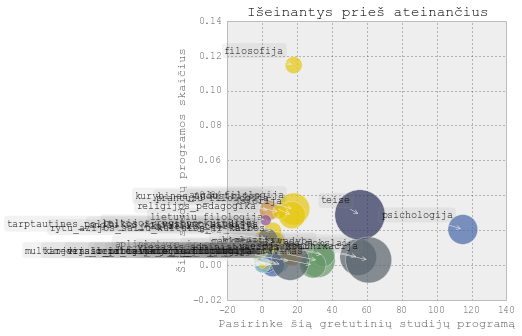

In [12]:
fig = plt.figure(num=None,
                 figsize=(5, 5),
                 dpi=80,
                 facecolor='w',
                 edgecolor='k')

labels = df.index
ax = fig.add_subplot(111)
ax.set_title(u'Išeinantys prieš ateinančius')
ax.set_xlabel(u'Pasirinke šią gretutinių studijų programą')
ax.set_ylabel(u'Šios studijų programos skaičius')
plt.scatter(of_minor, 
            df.santykis, 
            s=(df.visostojo * 3), 
            c=[programos_fakulteto_spalva[x] for x in df.index],
            alpha=0.7)

for label, x, y in zip(labels, of_minor, df.santykis):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-10, 10),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.3', fc = 'grey', alpha = 0.1),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()

In [13]:
import mpld3
fig = plt.figure(num=None,
                 figsize=(5, 5),
                 dpi=80,
                 facecolor='w',
                 edgecolor='k')

scatter = plt.scatter(of_minor, 
                      df.santykis, 
                      s=(df.visostojo * 3), 
                      c=[programos_fakulteto_spalva[x] for x in df.index],
                      alpha=0.7)

ax.grid(color='white', linestyle='solid')

#for label, x, y in zip(labels, of_minor, srtd.santykis):
#    plt.annotate(
#        label, 
#        xy = (x, y), xytext = (-10, 10),
#        textcoords = 'offset points', ha = 'right', va = 'bottom',
#        bbox = dict(boxstyle = 'round,pad=0.3', fc = 'grey', alpha = 0.1),
#        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
ax.set_title(u'Išeinantys prieš ateinančius')
ax.set_xlabel(u'Pasirinke šią gretutinių studijų programą')
ax.set_ylabel(u'Šios studijų programos skaičius')

labels = [x.decode('utf-8') for x in df.index]
tooltip = mpld3.plugins.PointLabelTooltip(scatter,labels=labels)  # labels=labels
mpld3.plugins.connect(fig, tooltip)

mpld3.display()

# 3. Faculty level analysis

<p>
<l>Now, when we have our dataframes ready, we can dive deeper into the analysis. First, let's see what we can do.</l>
<l>First, lets begin by analysing faculty level. But before we start it we have to recognise some things. First, it is not really abotu faculty level, it is about the reduction to faculty level. The data will include all individual cases. </l>
<l>At this moment, our focus is on faculty level, we will dive deeper, of course, but lets wait for a bit.</l>
<l>So, lets look how we filter </l>
</p>

In [14]:
# This shows ho we filter to entries of one faculty. In this case we look at the source of academic minor
# dfe[dfe['pagrfak'].isin(['hmf'])]

In [15]:
# This is another look, we see all cases when someone chooses an entry in other faculty.
#dfe[dfe['gretfak'].isin(['smf'])]

In [16]:
# dataframe for faculties

rez1 = [len(dfe[dfe['pagrfak'].isin([x])]) for x in facultylist]  # Gretutines pasirinkusių fakulto studentų skaičius.
rez2 = [len(dfe[dfe['pagrfak'].isin([x]) & ~dfe['gretfak'].isin([x])]) for x in facultylist]  # Gretutines fakulteto išorėje pasirinkusių studentų skaičius.
rez3 = [len(dfe[dfe['pagrfak'].isin([x]) & dfe['gretfak'].isin([x])]) for x in facultylist]
#rez3_1 = [rez1[x] - rez2[x] for x in range(len(rez1))]  # Gretutines tame pačiame fakultete pasirinkusių studentų skaičius. # rez3 == rez3_1

rez4 = [len(dfe[dfe['gretfak'].isin([x])]) for x in facultylist] 
rez5 = [len(dfe[dfe['gretfak'].isin([x]) & ~dfe['pagrfak'].isin([x])]) for x in facultylist]

rex = [rez1, rez2, rez3, rez4, rez5]
headers = ['is_fak','is_fak_out','to_same_fak','i_fak','i_fak_is_isores']
dft = pd.DataFrame(rex, index=headers, columns=facultylist)
dff = dft.T


# Sudėti šiuos du 

dft1 = pd.DataFrame([rez2,rez3], index=['is_fak_out','to_same_fak'], columns=facultylist)
dft2 = dft1.T
dft2['procentas'] = (dft2.is_fak_out / dft2.to_same_fak) * 10
dft2 = dft2.drop('procentas', 1)
dft2['programu_fakultete'] = dfn.groupby(['fakultetas']).size()
dft2['programu_NEfakultete'] = len(proglist) - dfn.groupby(['fakultetas']).size()
dft2['TSF_atsizvelgus_i_PF'] = (dft2.is_fak_out / dft2.programu_NEfakultete)
dft2['IFO_atsizvelgus_i_PF'] = (dft2.to_same_fak / (dft2.programu_fakultete - 1)) # nes negali i ta pacia
dft2['TSF_IFO_procentas'] = dft2.TSF_atsizvelgus_i_PF / dft2.IFO_atsizvelgus_i_PF * 50

srtd = dft2.sort('TSF_IFO_procentas',ascending=True)
srtd.head()

,is_fak_out,to_same_fak,programu_fakultete,programu_NEfakultete,TSF_atsizvelgus_i_PF,IFO_atsizvelgus_i_PF,TSF_IFO_procentas
tf,81,0,1,60,1.350000,inf,0.000000
smf,46,42,6,55,0.836364,8.400000,4.978355
evf,18,9,5,56,0.321429,2.250000,7.142857
gmf,33,23,7,54,0.611111,3.833333,7.971014
if,17,3,3,58,0.293103,1.500000,9.770115


###### Preparation for plotting.

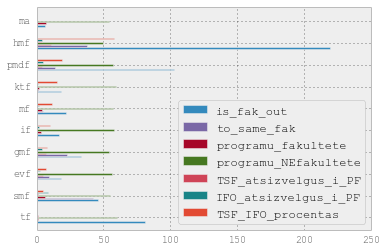

In [17]:
# Ar palikti fakultetus, kurie turi labai mažai studentų? Manau reikia atsisakyti MA ir TF.
# Kaip pridėti procentinę liniją?

# Šiuos duomenis galime patikslinti, atsižvelgiant į pasirinkimo galimybę. 
# Kiek Buvo galima pasirinkti programų fakulteto viduje? 
# Teisės fakulteto studentai turėjo 0 galimybių pasirinkti fakulteto viduje.
# Didesnį pasirinkimą turėjo HMF, SMF ir kitų programų studentai.
# HMF, nepaisydami didelio pasirinkimo, juda į 
# SMF, linkę likti tame pačiame fakultete.
# GMF, linkę likti ten pat.
# PMDF, didelis judėjimas į išorę, vidutinis pasirinkimas.

# Kas tiesa, tas nemelas. Sunku įvertinti programų pasirinkimą, klausimai: 
# "apie kiek programų studentai svarstė" ir 
#  "kiek tuo metu programų buvo"?
srtd.sort('TSF_IFO_procentas',ascending=True).plot(kind='barh', alpha=1)

Būtina atsžvelgti, jog ne visi gali judėti į kitą fakultetą. Geriausias to pavyzdys - teisės fakultetas. Jame - tik viena studijų programa. Toliau esančiame grafe tai ir darome.

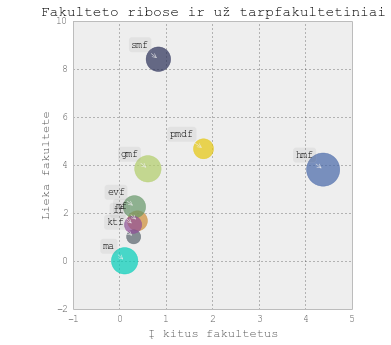

In [18]:
fig = plt.figure(num=None,
                 figsize=(5, 5),
                 dpi=80,
                 facecolor='w',
                 edgecolor='k')

labels = dft2.index.unique()
plt.subplots_adjust(bottom = 0.1)

ax = fig.add_subplot(111)
ax.set_title(u'Fakulteto ribose ir už tarpfakultetiniai')
ax.set_xlabel(u'Į kitus fakultetus')
ax.set_ylabel(u'Lieka fakultete')

COLORS = [fak_colors[x] for x in facultylist]

plt.scatter(dft2.TSF_atsizvelgus_i_PF, 
            dft2.IFO_atsizvelgus_i_PF, 
            alpha=0.7, 
            color=COLORS, 
            s=dft2.programu_fakultete * 100)

for label, x, y in zip(labels, dft2.TSF_atsizvelgus_i_PF, dft2.IFO_atsizvelgus_i_PF):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-10, 10),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.3', fc = 'grey', alpha = 0.1),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
##########################
# padaryti ta pati, tik atskiroms programoms.
##########################
plt.show()

# Pairs of faculties

## HMF and SMF

In [19]:
import matplotlib.pyplot as plt

plt.figure()
# Example with HMF and SMF
fltrd1 = dfe[dfe['pagrfak'].isin(['hmf'])]
fltrd2 = fltrd1[fltrd1['gretfak'].isin(['smf'])]
grpd = fltrd2.groupby(['gret']).size().order('gret')
#grpd.plot(title='hmf studentai renkasi smf gretutines', kind='barh')
#grpd
#plt.show()

C:\Users\Saonkfas\Anaconda\lib\site-packages\pandas\core\series.py:1686: FutureWarning: na_last is deprecated. Please use na_position instead
  FutureWarning)


In [20]:
fltrd1 = dfe[dfe['pagrfak'].isin(['smf'])]
fltrd2 = fltrd1[fltrd1['gretfak'].isin(['hmf'])]
grpd = fltrd2.groupby(['gret']).size().order('gret')
#grpd.plot(title='smf studentai renkasi hmf gretutines', kind='barh')
#plt.show()

# 4 One faculty analysis

### Faculty of social sciences

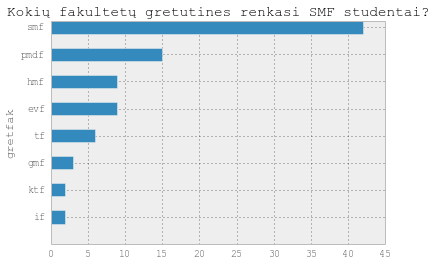

In [21]:
# Lets analyse SMF
plt.figure()
smf = dfe[dfe['pagrfak'].isin(['smf'])]
grpd = smf.groupby('gretfak').size().order(ascending=True)
grpd.plot(kind='barh',title=u'Kokių fakultetų gretutines renkasi SMF studentai?')


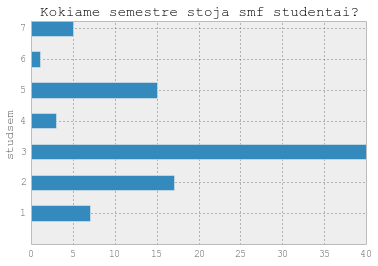

In [22]:
plt.figure()
grpd1 = smf.groupby('studsem').size() #Studsem, not very interesting. But I should make them all.
grpd1.plot(kind='barh',title=u'Kokiame semestre stoja smf studentai?')

## SMF į HMF

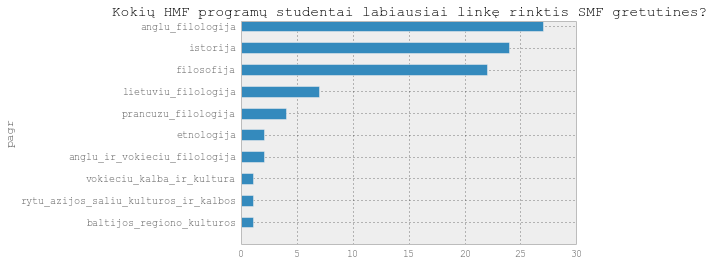

In [23]:
# Kokių HMF programų studentai labiausiai linkę rinktis SMF gretutines?
dfh2s = dfe[dfe.pagrfak.isin(['hmf']) & dfe.gretfak.isin(['smf'])]
TITLE = u'Kokių HMF programų studentai labiausiai linkę rinktis SMF gretutines?'
dfh2s.groupby('pagr').size().order(ascending=True).plot(kind='barh', title=TITLE)

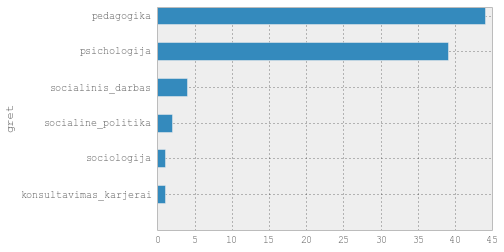

In [24]:
# Kokias SMF gretutines labiausiai linke rinktis HMF studentai?
dfh2s.groupby('gret').size().order(ascending=True).plot(kind='barh')

In [25]:
# Faculty Ego(INTERNAL)graph
faculty_internal_ego_graph = [dfe[dfe.pagrfak.isin([x]) & dfe.gretfak.isin([x])] for x in facultylist]
[x.groupby(['studsem']).size() for x in faculty_internal_ego_graph][0]
[x.groupby(['gretfak']).size() for x in faculty_internal_ego_graph]

[gretfak
 mf         5
 dtype: int64, Series([], dtype: int64), gretfak
 gmf        23
 dtype: int64, gretfak
 evf        9
 dtype: int64, Series([], dtype: int64), gretfak
 smf        42
 dtype: int64, gretfak
 hmf        38
 dtype: int64, gretfak
 pmdf       14
 dtype: int64, gretfak
 ktf        1
 dtype: int64, gretfak
 if         3
 dtype: int64]

# 5 NetworkX

## 5.1 NetworkX allows us to get more data

In [26]:
import networkx as nx
import mpld3

# Create the graph object.
G = nx.MultiDiGraph()
GF = nx.MultiDiGraph() # Graph of faculty level

Couldn't import dot_parser, loading of dot files will not be possible.


Gaukime duomenis iš Pandas.

In [27]:
pd2nx = dfe.T.to_dict() #pandas to networkx
pd2nx1 = [(pd2nx[x]['pagr'],
           pd2nx[x]['gret'],
           {'gretall': pd2nx[x]['gretall'],
            'gretfak': pd2nx[x]['gretfak'],
            'gretpab': pd2nx[x]['gretpab'],
            'gretpop': pd2nx[x]['gretpop'],
            'gretpradz': pd2nx[x]['gretpradz'],
            'pagrall': pd2nx[x]['pagrall'],
            'pagrfak': pd2nx[x]['pagrfak'],
            'pagrpop': pd2nx[x]['pagrpop'],
            'saltinionr': pd2nx[x]['saltinionr'],
            'studmet': pd2nx[x]['studmet'],
            'studsem': pd2nx[x]['studsem'],
            'vardas': pd2nx[x]['vardas']}) 
            for x in range(len(pd2nx))]

# Add edges and their attributes (nodes are included).
G.add_edges_from(pd2nx1)

# Add node attributes.
for x in G.nodes():
    G.node[x]['fakultetas'] = get_faculty_name[x]
    #add more?
    
#G.nodes(data=True)
#G.edges(data=True)
len(G.nodes()),len(G.edges())


(61, 698)

###### SUB GRAPHS

Lets start by crating an internal graph. The criteria is simple, all nodes of graph have to be in same faculty.

In [28]:
facultylist

{u'evf', u'gmf', u'hmf', u'if', u'ktf', u'ma', u'mf', u'pmdf', u'smf', u'tf'}

### 5.1 Program graphs

### 5.1.1 Program ego graphs

In [29]:
# This is FACULTY GRAPH. I SHOULD MOVE IT. But no, it focus on level of programs.
faculty = u'hmf'
GHMF=nx.Graph([(u,v,d) for u,v,d in G.edges(data=True) if d[u'pagrfak'] == faculty or d[u'gretfak'] == faculty])

# Dictionary of faculty Egographs
# Move to another place.
mydict = {}
for x in facultylist:
    graph = nx.MultiDiGraph([(u,v,d) for u,v,d in G.edges(data=True) if d['pagrfak'] == x or d['gretfak'] == x])
    mydict[x] = graph

### 5.1.2 Pairs of programs

In [30]:
#This place should contain pairs of programs.  What we can say about how philosophy interacts with law?
x,y =u'hmf',u'pmdf'
fakpair = {}
fakpair['hmfsmf'] = nx.MultiDiGraph([(u,v,d) for u,v,d in G.edges(data=True) if d['pagrfak'] == x and d['gretfak'] == y])
# Also, how many different interaction possibilities do we have? What are the trends of interaction?
fakpair

{'hmfsmf': <networkx.classes.multidigraph.MultiDiGraph at 0xe0e36a0>}

### 5.1.3 Program triplets

In [31]:
# This is still not working but someday I will be able to use deque.
from collections import deque
triplet = deque(['filosofija','etnologija','teologija'])
triplet1 = deque(['filosofija','teologija','etnologija'])
triplet2 = deque(['etnologija','filosofija','teologija'])
triplet1.rotate(1)
trplt = triplet1.rotate(1)
trplt





headers = [u'pagr', u'gret', u'pagrfak', u'gretfak', u'Weight']
def haha(x, y, z):
    filtered = dfe[dfe.pagr.isin([x]) & dfe.gret.isin([y])]
    
    if len(filtered) > 0:
        grpd = filtered.groupby([u'gret', u'pagr']).size()
        filtered1 = dfe[dfe.pagr.isin([y]) & dfe.gret.isin([z])]
        
        if len(filtered1) > 0:
            grpd1 = filtered1.groupby([u'gret', u'pagr']).size()
            filtered2 = dfe[dfe.pagr.isin([z]) & dfe.gret.isin([x])]
            
            if len(filtered2) > 0:
                grpd2 = filtered2.groupby([u'gret', u'pagr']).size()
                ret = [len(filtered), len(filtered1), len(filtered2)]
                ret1 = len(filtered) * len(filtered1) * len(filtered2)
                ret2 = [grpd, grpd1, grpd2]

                print(x, y, z, ret1)
                return[ret, ret1, ret2]

def haha2(x, y, z):
    filtered = dfe[dfe.pagr.isin([x]) & dfe.gret.isin([y])]

    if len(filtered) > 0:
        filtered1 = dfe[dfe.pagr.isin([y]) & dfe.gret.isin([z])]

        if len(filtered1) > 0:
            filtered2 = dfe[dfe.pagr.isin([z]) & dfe.gret.isin([x])]

            if len(filtered2) > 0:
                ret = [len(filtered), len(filtered1), len(filtered2)]
                ret1 = len(filtered) * len(filtered1) * len(filtered2)
                
                return([x, y, z], ret, ret1)

def ha():
    thelist = []
    seenlist = []
    count = 0
    for k in proglist:
        count += 1
        for l in proglist:
            for m in proglist:
                seenlist.append([k, l, m])
                if[k, l, m] in seenlist is not True:
                    rez = haha2(k, l, m)
                    if rez is not None:
                        thelist.append(deque(rez))
                        print (rez)
    return thelist

import pickle

#alltriplets = ha()
f = open("Data/alltriplets.p","rb")

bin_data = f.read()
alltriplets = pickle.loads(bin_data)

#f = open("Data/alltriplets_unicode.p","rb")
#alltriplets  = pickle.load(f)

#pickle.dump(alltriplets, open( "Data/alltriplets.p", "wb" ))
#pickle.dump(unicode(alltriplets), open( "Data/alltriplets_unicode.p", "wb" ))

#TRIPLETS
rez = [x for x in alltriplets]
trip_df = pd.DataFrame(rez)

The following are not triplets

In [32]:
SG = mydict[faculty]
for x in SG.nodes():
    SG.node[x]['fakultetas'] = get_faculty_name[x]

all_faculties_in_graph = [get_faculty_name[x] for x in SG.nodes()]

In [33]:
list_of_node_lists = []
for FAK in set(all_faculties_in_graph):
    node_list = []
    node_list = [n for n, attrdict in SG.node.items() if attrdict["fakultetas"] == FAK]
    list_of_node_lists.append(node_list)


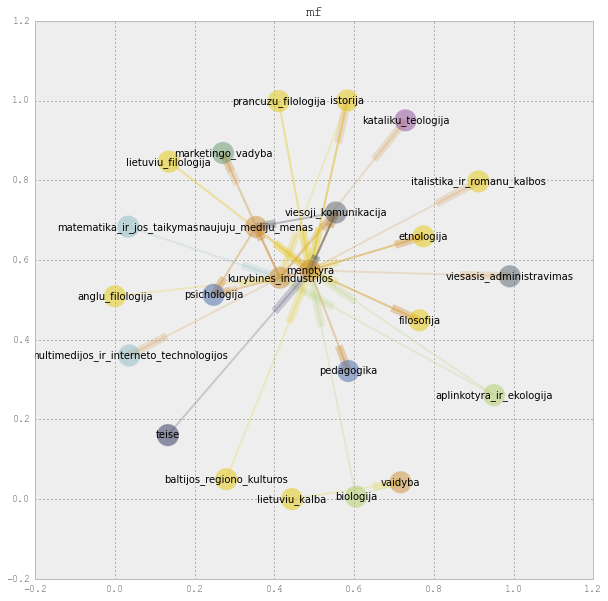

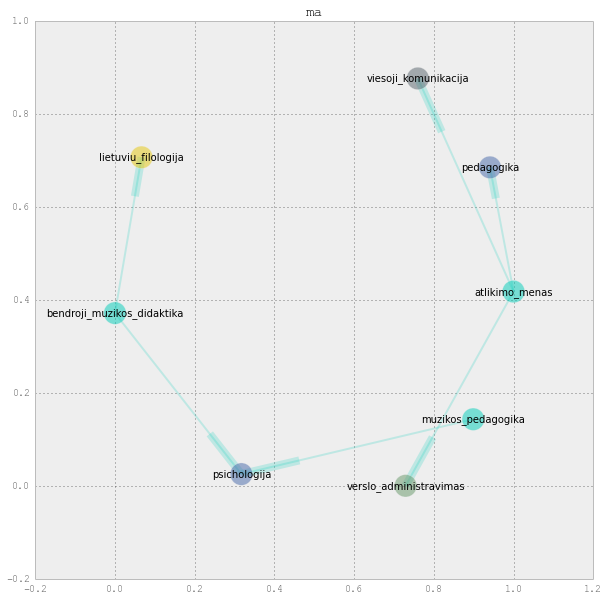

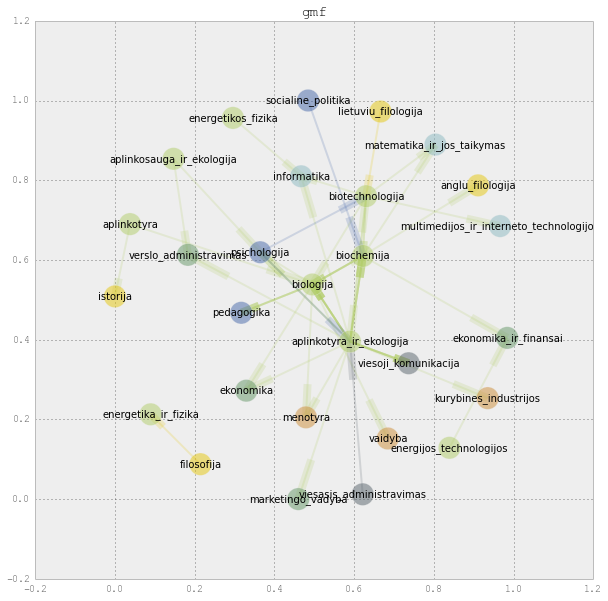

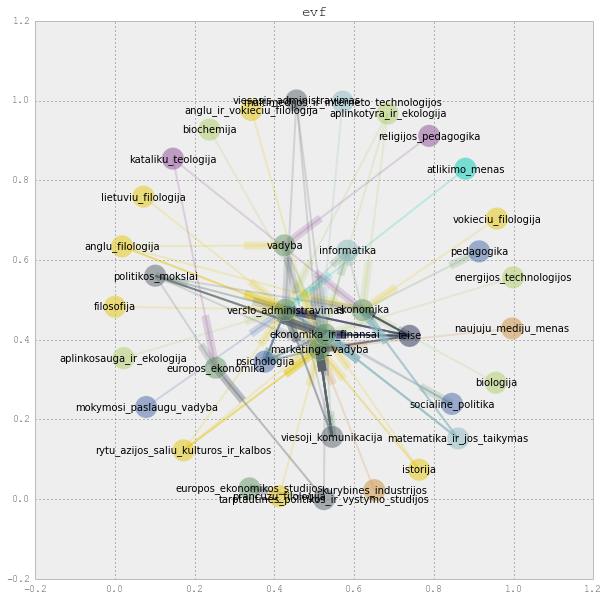

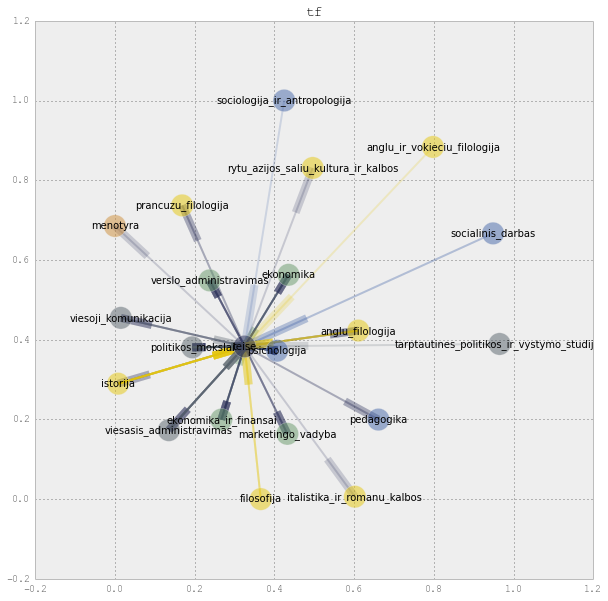

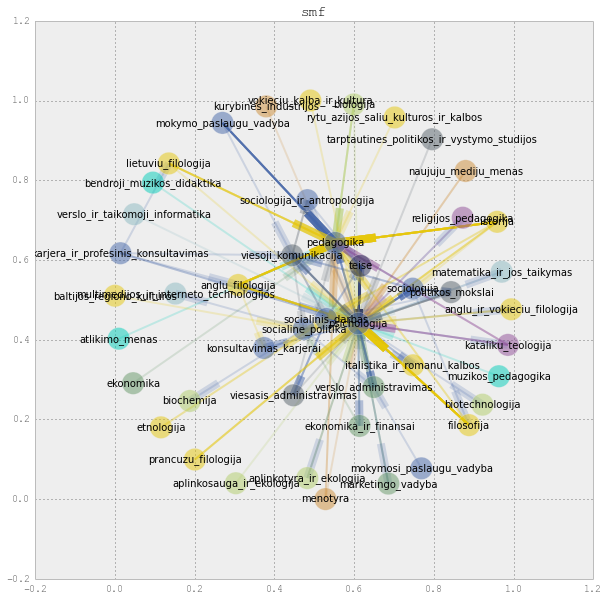

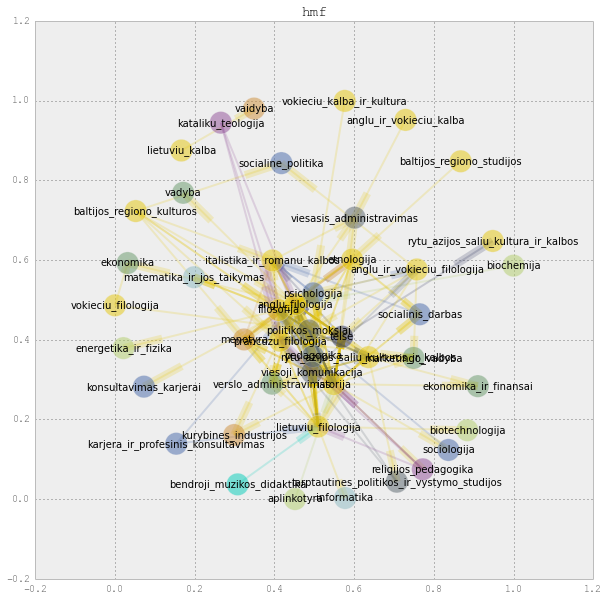

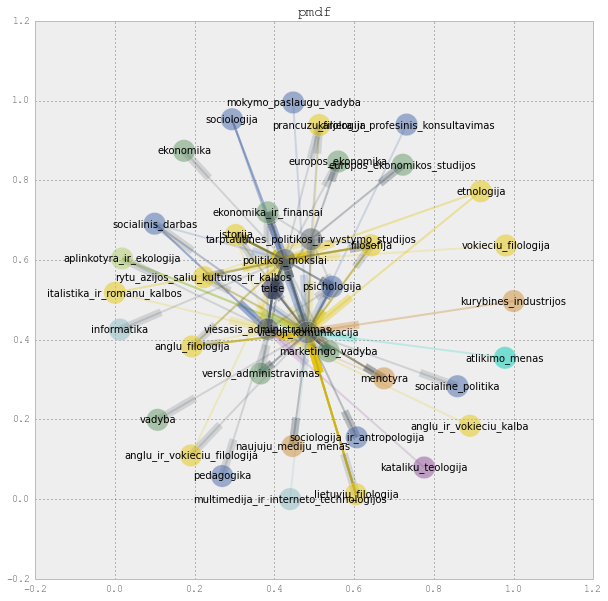

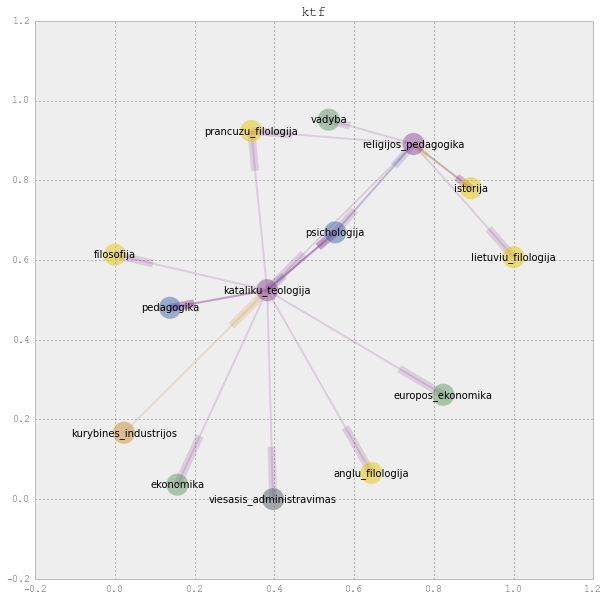

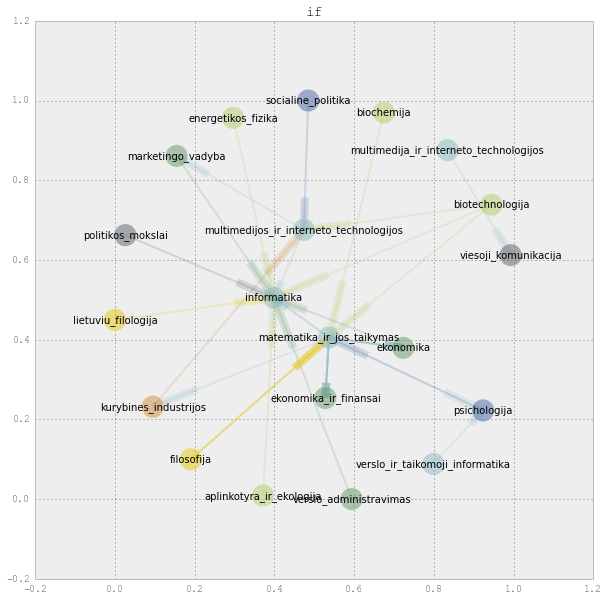

[None, None, None, None, None, None, None, None, None, None]

In [34]:
### Developing a colored version.
#from mpld3 import enable_notebook
#enable_notebook()

def draw_graphs(faculty):
    G = mydict[faculty]
    for x in G.nodes():
       G.node[x]['fakultetas'] = get_faculty_name[x]
          
    plt.figure(figsize=(10, 10))
    plt.title('{}'.format(faculty))
    
    pos=nx.spring_layout(G, iterations=100)
    
    all_faculties_in_graph = [get_faculty_name[x] for x in G.nodes()]
    rez = set(all_faculties_in_graph)
   # weights = [n for n, attrdict in G.edge.items() if attrdict["fakultetas"] == "hmf"]
    count = 0
    for x in rez:
        count += 1
        nx.draw_networkx_nodes(G,
                               pos,
                               #nodelist=G.nodes()[5:-1],
                               nodelist=[z for z in G.nodes() if get_faculty_name[z] == x],
                               node_color=fak_colors[x],
                               node_size=500,
                               alpha=0.5)
    
    count = 0
    for x in rez:
        nx.draw_networkx_edges(G,
                               pos,
         #                      edgelist=G.edges(),
                               edgelist = [(u,v,d) for u,v,d in G.edges(data=True) if get_faculty_name[u] == x],
                               width=2,
                               alpha=0.2,
                               weight=1,
                               edge_color=fak_colors[x])

        #add nx.draw_networkx_edges... if u and v already in graph
    nx.draw_networkx_labels(G, 
                             pos, 
                             labels=None, 
                             font_size=10, 
                             font_color='k', 
                             font_family='sans-serif', 
                             font_weight='normal', 
                             alpha=0.6, 
                             ax=None)
    plt.show()
[draw_graphs(x) for x in facultylist]

In [35]:
# Wonderful, but lets do the same for 
#EACH PROGRAM! PROGRAMS EGO NETWORK
#INTERNAL FACULTY RELATIONS

In [36]:
# Let's do internal faculty


In [37]:
# Let's do favorite locations of each faculty. Which faculty do they like to go to

In [38]:
# Let's do STUDSEM paterns

In [39]:
# Let's do changes of faculty patterns. What amount of people go where, is it continuous or is it fluctuating?

In [40]:
# Let's do some tweaks for pring layout.

## 5.2 Faculty graphs (where relations between faculties are analysed)

### 5.2.1 Ego

### 5.2.2 Twin(pair)

In [41]:
# Works only with two graphs
GHSC = nx.compose(mydict['hmf'],mydict['smf'])
len(GHSC.edges()), len(GHSC.nodes())

(469, 56)

We have many connections between programs. These connections are very itneresting. The most interesting thing to us is, whether we can interpret connections as one sided. We have a hypothesis, that each connection is onesided, to prove that, we have to find, how values of connections compare.

If we find that connections are indeed onesided, we will enable to reduce our graph to DiGraph, that will help us to process the graph even further.

We will not abandon the data, we will identify unlikely connections. That is to say, connections, that go against the stream.

In [42]:
def gauk_tikruosius_svorius(x,y):
    dft = dfe.loc[:,['pagr','pagrpop','pagrall']]

    x_pagrpop = dft[dft.pagr == x].drop_duplicates()['pagrpop'].values
    x_pagrall = dft[dft.pagr == x].drop_duplicates()['pagrall'].values

    y_pagrpop = dft[dft.pagr == y].drop_duplicates()['pagrpop'].values
    y_pagrall = dft[dft.pagr == y].drop_duplicates()['pagrall'].values

    x_to_y = len(dfe[dfe['pagr'].isin([x]) & dfe['gret'].isin([y])])
    y_to_x = len(dfe[dfe['pagr'].isin([y]) & dfe['gret'].isin([x])])
    
    rez = [x, y, 
           float(x_pagrpop), float(x_pagrall),  # Something wroing with returning 0 length arrays and turning them to float
           float(y_pagrpop), float(y_pagrall), 
           x_to_y, y_to_x]
    
    value1 = 0
    value2 = 0
    
    if float(rez[6]) != 0:
        value1 = (float(rez[3]) / float(rez[6]))
    if float(rez[7]) != 0:
        value2 = (float(rez[5]) / float(rez[7]))
                  
    ret = [rez[0],
           rez[1], 
           value1 * rez[2],
           value2 * rez[4]]
    return ret
x,y = 'istorija','teise'


dft = dfe.loc[:,['pagr','pagrpop','pagrall']]
dft

,pagr,pagrpop,pagrall
0,biochemija,0.087500,9
1,prancuzu_filologija,0.181818,10
2,viesoji_komunikacija,0.073759,61
...,...,...,...
695,menotyra,0.077844,17
696,kurybines_industrijos,0.078125,4
697,marketingo_vadyba,0.039326,35


In [43]:
rex = []
for x in proglist:
    for y in proglist:
        rezz = []
        try:
            rezz = gauk_tikruosius_svorius(x,y)
        except:
            pass
        rex.append(rezz)

In [45]:
DTTTTTT = pd.DataFrame(rex, columns=['pav1','pav2','wght1','wght2'])
DTTTTTT

,pav1,pav2,wght1,wght2
0,marketingo_vadyba,marketingo_vadyba,0.000000,0.000000
1,marketingo_vadyba,ekonomika_ir_finansai,0.688202,0.329897
2,marketingo_vadyba,atlikimo_menas,0.000000,NaN
...,...,...,...,...
3718,teise,biochemija,0.000000,0.000000
3719,teise,italistika_ir_romanu_kalbos,5.425837,NaN
3720,teise,teise,0.000000,0.000000


In [46]:
import pandas as pd
rex = [x for x in rex if x]
#[len(x) for x in rex] #Check

names1 = [x[0] for x in rex] 
names2 = [x[1] for x in rex]
values = [x[2] for x in rex]

DATAFRAME = pd.DataFrame()
DATAFRAME = pd.DataFrame(rex,
                         columns=['pagr','gret','weight','weight2'])
DATAFRAME = DATAFRAME.dropna()
DATAFRAME = DATAFRAME[DATAFRAME.weight != 0].sort('weight')
DATAFRAME1 = DATAFRAME
DATAFRAME = DATAFRAME.drop('weight2', 1)

<function matplotlib.pyplot.show>

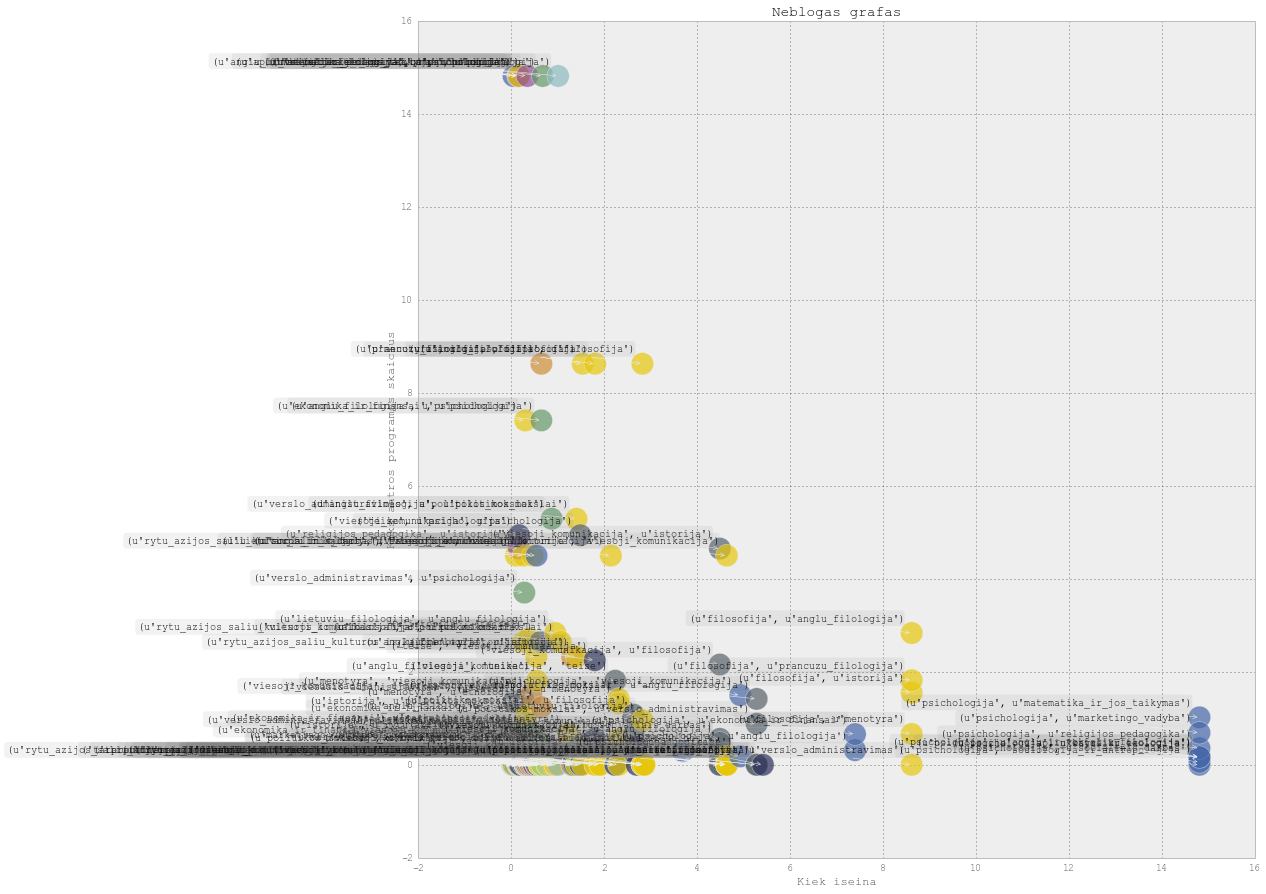

In [48]:
fig = plt.figure(num=None,
                 figsize=(15, 15),
                 dpi=80,
                 facecolor='w',
                 edgecolor='k')

labels = zip(DATAFRAME1.pagr,DATAFRAME1.gret)
ax = fig.add_subplot(111)
ax.set_title(u'Neblogas grafas')
ax.set_xlabel(u'Kiek iseina')
ax.set_ylabel(u'Koks antros programos skaicius')
plt.scatter(DATAFRAME1.weight, 
            DATAFRAME1.weight2, 
            s=500, 
            c=[programos_fakulteto_spalva[x] for x in DATAFRAME1.pagr],
            alpha=0.7)

for label, x, y in zip(labels, DATAFRAME1.weight, DATAFRAME1.weight2):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-10, 10),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.3', fc = 'grey', alpha = 0.1),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show

In [49]:
pd2nx = DATAFRAME.T.to_dict()
pd2nx2 = [(pd2nx[x]['pagr'], pd2nx[x]['gret'], {'gretall': pd2nx[x]['weight']}) for x in DATAFRAME.index]

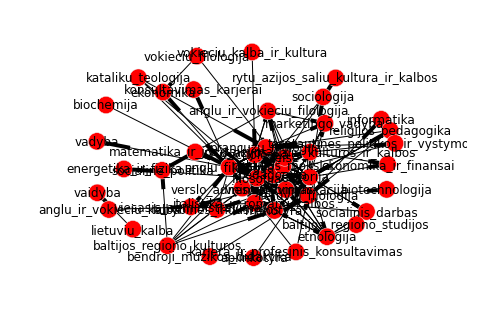

In [51]:
from mpld3 import enable_notebook
enable_notebook()

G = nx.MultiDiGraph(pd2nx2)
#SG = G.subgraph([n for n, attrdict in G.node.items() 
#                 if (attrdict["fakultetas"] == "hmf"]) 
#                 or (attrdict["fakultetas"] == "smf"]) 
nx.draw(SG)

In [52]:
#x_pagrpop = dft[dft.pagr == x].drop_duplicates()['pagrpop'].values
#x_pagrall = dft[dft.pagr == x].drop_duplicates()['pagrall'].values

In [53]:
# Faculty pairs
# Better to do some of this with pandas.
# creates a list of dictionaries, where dictionaries represent relations between two. PAIR
mylist = []
for x in proglist:
    mydict = {}
    mydict['x'] = x
    
  #  lala = dfe.iloc['pagrpop','pagrviso']
    for y in proglist:
        mydict['y'] = y
        mydict['xy'] = [len(dfe[dfe['pagr'].isin([x]) & dfe['gret'].isin([y])])][0]
        mydict['yx'] = [len(dfe[dfe['pagr'].isin([y]) & dfe['pagr'].isin([x])])][0]
        mylist.append(mydict)
#some1 = [x['yx'] for x in mylist if x['xy'] > 1]
#some2 = [x['yx'] for x in mylist if x['yx'] > 1]


In [54]:
mylist[2]

{'x': u'marketingo_vadyba', 'xy': 0, 'y': 'teise', 'yx': 0}

### 5.2.3 Faculty triplets

## 5.3.1 Triplet(Clique) graphs

In [55]:
# Prie dfe prideti PASVERTA OUT

grpd = dfe[dfe.pagrpop > 0].sort('pagrpop', ascending=0)
drp = grpd.drop_duplicates(cols=['pagr', 'gret'])[['pagr', 'gret', 'pagrpop']]
THEGRAPH = nx.DiGraph()


dfl1 = drp['pagr'].tolist()
dfl2 = drp['gret'].tolist()
dfl3 = drp['pagrpop'].tolist()
dfl = zip(dfl1,
          dfl2,
          dfl3)

for x in range(len(dfl1)):
    THEGRAPH.add_edge(dfl1[x], dfl2[x])
    THEGRAPH[dfl1[x]][dfl2[x]]['weight'] = float(dfl3[x])
#PLOT THEGRAPH

C:\Users\Saonkfas\Anaconda\lib\site-packages\pandas\util\decorators.py:53: FutureWarning: cols is deprecated, use subset instead
  warnings.warn(msg, FutureWarning)


## STUDSEM

In [56]:
#rez = [dfe[dfe.pagr == x].groupby('studsem').size() for x in proglist] # get lots of dataframes
def get_all_studsems(x, pagr_or_gret): #By study program
    count = 0
    myarray = []
    mymainlist = []
    for z in range(8):
        count += 1
        if pagr_or_gret == 'pagr':
            rez = dfe[dfe.pagr == x]
        if pagr_or_gret == 'gret':
            rez = dfe[dfe.gret == x]
        rez = rez[rez.studsem == count]
        rez = len(rez)
    #    mydict[count] = np.array(rez)
        myarray.append(rez)
    mymainlist.append(np.array(myarray))
    return mymainlist

#get_all_studsems('filosofija') # TEST

In [57]:
import numpy as nphgf
rez_pagr = [get_all_studsems(x,'pagr') for x in proglist]
rez_gret = [get_all_studsems(x,'gret') for x in proglist]
DFT = pd.DataFrame(rez_pagr, proglist, ['studsem_cnts_pagr'])
DFT['studsem_cnts_gret'] = [x[0] for x in rez_gret]
#DFT.iloc[1,0]
#DFT.T.psichologija
DFT

,studsem_cnts_pagr,studsem_cnts_gret
marketingo_vadyba,"[1, 4, 0, 0, 2, 0, 0, 0]","[5, 11, 17, 1, 1, 0, 0, 0]"
ekonomika_ir_finansai,"[1, 3, 4, 0, 0, 0, 0, 0]","[2, 7, 3, 9, 8, 1, 1, 1]"
atlikimo_menas,"[0, 1, 2, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]"
...,...,...
biochemija,"[0, 6, 1, 0, 0, 0, 0, 0]","[1, 6, 2, 0, 0, 0, 0, 0]"
italistika_ir_romanu_kalbos,"[4, 0, 1, 0, 0, 0, 0, 0]","[1, 1, 4, 0, 2, 0, 0, 0]"
teise,"[24, 15, 31, 4, 2, 4, 1, 0]","[5, 19, 26, 2, 2, 1, 1, 0]"


In [58]:
def get_stats_of_array(arrayy):
    mylist = []       
    rez1 = [sum(arrayy[0:4]), sum(arrayy[4:8])] # Pirma metu puse, pries antra
    rez2 = [sum(arrayy[0::2]), sum(arrayy[1::2])] #Pavasaris pries rudeni.
    rez3 = [sum(arrayy[0:1]), sum(arrayy[2:3]), sum(arrayy[4:5]), sum(arrayy[6:7])]
    mylist.extend([rez1,rez2,rez3])
    return mylist

# Pagr
REX1 = [get_stats_of_array(DFT.iloc[x,0])[0] for x in range(len(DFT))]
REX2 = [get_stats_of_array(DFT.iloc[x,0])[1] for x in range(len(DFT))]
REX3 = [get_stats_of_array(DFT.iloc[x,0])[2] for x in range(len(DFT))]

DFT['prps_pagr'] = REX1
DFT['pvsrs_rd_pagr'] = REX2
DFT['ktr_mt_pagr'] = REX3

# Gret
REX4 = [get_stats_of_array(DFT.iloc[x,1])[0] for x in range(len(DFT))]
REX5 = [get_stats_of_array(DFT.iloc[x,1])[1] for x in range(len(DFT))]
REX6 = [get_stats_of_array(DFT.iloc[x,1])[2] for x in range(len(DFT))]

DFT['prps_gret'] = REX4
DFT['pvsrs_rd_gret'] = REX5
DFT['ktr_mt_gret'] = REX6
DFT

,studsem_cnts_pagr,studsem_cnts_gret,prps_pagr,pvsrs_rd_pagr,ktr_mt_pagr,prps_gret,pvsrs_rd_gret,ktr_mt_gret
marketingo_vadyba,"[1, 4, 0, 0, 2, 0, 0, 0]","[5, 11, 17, 1, 1, 0, 0, 0]","[5, 2]","[3, 4]","[1, 0, 2, 0]","[34, 1]","[23, 12]","[5, 17, 1, 0]"
ekonomika_ir_finansai,"[1, 3, 4, 0, 0, 0, 0, 0]","[2, 7, 3, 9, 8, 1, 1, 1]","[8, 0]","[5, 3]","[1, 4, 0, 0]","[21, 11]","[14, 18]","[2, 3, 8, 1]"
atlikimo_menas,"[0, 1, 2, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[3, 0]","[2, 1]","[0, 2, 0, 0]","[0, 0]","[0, 0]","[0, 0, 0, 0]"
...,...,...,...,...,...,...,...,...
biochemija,"[0, 6, 1, 0, 0, 0, 0, 0]","[1, 6, 2, 0, 0, 0, 0, 0]","[7, 0]","[1, 6]","[0, 1, 0, 0]","[9, 0]","[3, 6]","[1, 2, 0, 0]"
italistika_ir_romanu_kalbos,"[4, 0, 1, 0, 0, 0, 0, 0]","[1, 1, 4, 0, 2, 0, 0, 0]","[5, 0]","[5, 0]","[4, 1, 0, 0]","[6, 2]","[7, 1]","[1, 4, 2, 0]"
teise,"[24, 15, 31, 4, 2, 4, 1, 0]","[5, 19, 26, 2, 2, 1, 1, 0]","[74, 7]","[58, 23]","[24, 31, 2, 1]","[52, 4]","[34, 22]","[5, 26, 2, 1]"


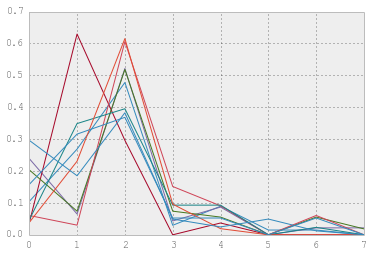

In [59]:
def PLOT_GRAPH(axis,threshold):
    for x in range(len(DFT)):
        if sum(DFT.iloc[x,axis]) > threshold:
            plt.plot(DFT.iloc[x,axis] / float(sum(DFT.iloc[x,axis])))
PLOT_GRAPH(0,20)

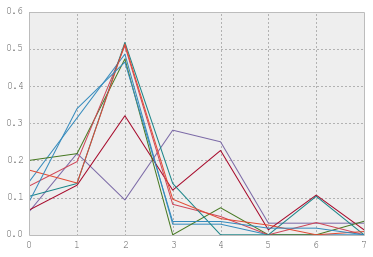

In [60]:
PLOT_GRAPH(1,20)

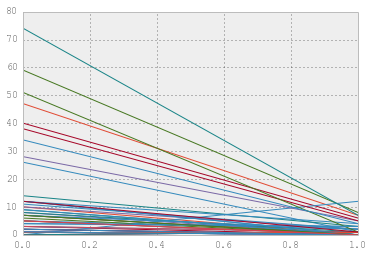

In [61]:
for x in range(len(DFT)):
    plt.plot(DFT.iloc[x,2])

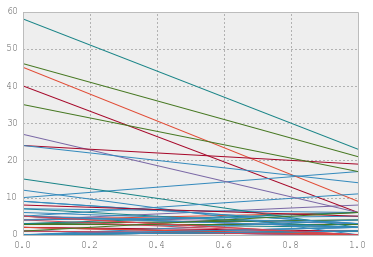

In [62]:
for x in range(len(DFT)):
    plt.plot(DFT.iloc[x,3])

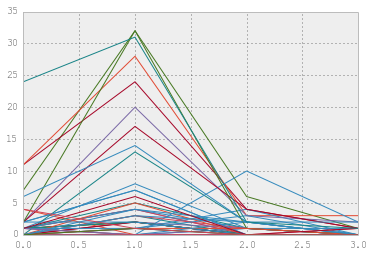

In [63]:
for x in range(len(DFT)):
    plt.plot(DFT.iloc[x,4])

array([[<matplotlib.axes.AxesSubplot object at 0x0000000012A62E10>,
        <matplotlib.axes.AxesSubplot object at 0x0000000013FF11D0>]], dtype=object)

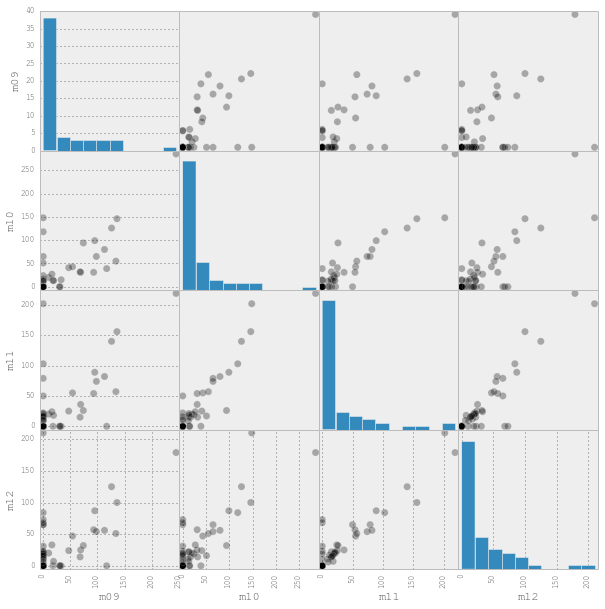

In [73]:
import numpy as np
import pandas as pd
from pandas.tools.plotting import parallel_coordinates

a = dfn.loc[:,['m09','m10','m11','m12']].iloc[1]
b = dfn.loc[:,['m09','m10','m11','m12']].iloc[2]
c = dfn.loc[:,['m09','m10','m11','m12']].iloc[3]

#dfn
##[dfn.loc[:,['m09','m10','m11','m12']].iloc[1] for x in range(len(dfn))]
df = pd.DataFrame([dfn.loc[:,['m09','m10','m11','m12']].iloc[x] 
                   for x in range(len(dfn))], index=dfn.pavadinimas.values)

#from mpld3 import enable_notebook # Causes soooo much lag!
#enable_notebook() # Causes soooo much lag! Also too much of axis.
mpld3.disable_notebook
pd.scatter_matrix(df, 
                  diagonal='hist',
                  figsize=(10,10),
                  alpha=0.3,
                  marker='o',
                  c='k',
                  #c=[programos_fakulteto_spalva[x] for x in df.index],
                  s=50)


## KITA

Turimea atsižvelgti, į tai, kiek studentų galėjo pasirinkti gretutines.

Now, lets create something that combines the two numbers.

## Down to the individual level

In [65]:
%qtconsole

The unique cases of choosing academic minor. The cases that oppose the dominant trends. Howe we can find them?

We did a lot already. But we did not assess any of the individual choices. It is very good, that we have made a throughout analysis of  the environment, but at the end, it is all about choices of individuals. So what are we interested in? We are interested in such things:
o Can we find the motivation of the choice?
o Can we assess the success of the choice?

In [66]:
prg1, prg2 = 'filosofija', 'psichologija'
[len(dfe[dfe['pagr'].isin([prg1]) & dfe['gret'].isin([prg2])])]

[20]

In [67]:
# Creating AFG(ALL FACULTY GRAPHS) this will make it easier to go through them. The graph is basically an EgoGraphf of Faculty
AFG = [nx.DiGraph for x in facultylist] # All Faculty Graphs
#add edges and nodes

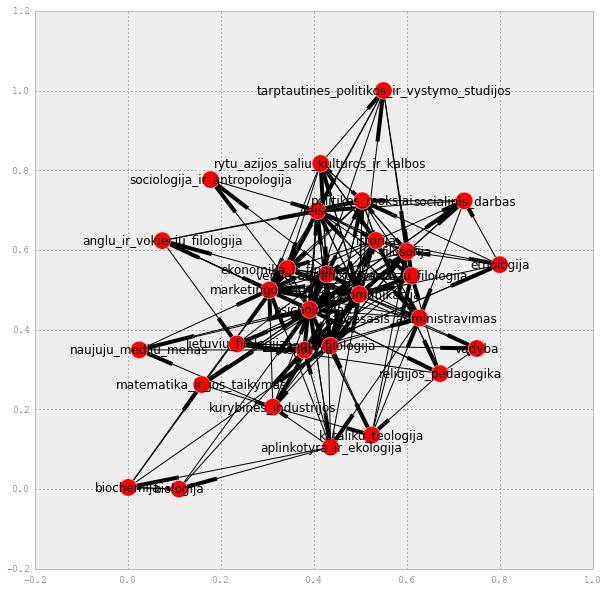

In [71]:
# THIS PART IS GOOD!!!
%matplotlib inline
import networkx as nx
pos = nx.fruchterman_reingold_layout(G)
plt.figure(figsize=(10, 10))
nx.draw_networkx(G, pos, with_labels=True) # unicod eproblems
plt.show()